Libraries 

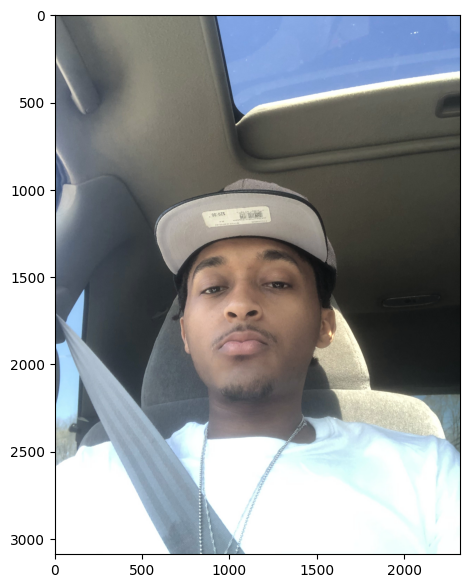

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('C:\\Users\\Reese\\OneDrive\\Pictures\\In Class Project2\\ProjectSelfie.jpg')
fig = plt.figure(figsize = (7,7))
plt.imshow(img)


filter

Text(0.5, 1.0, 'Gaussian Filter')

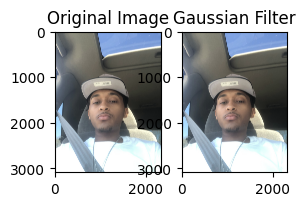

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('C:\\Users\\Reese\\OneDrive\\Pictures\\In Class Project2\\ProjectSelfie.jpg')
gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16
imgGaussian = cv2.filter2D(img, -1, gaussian_filter)


fig = plt.figure(figsize = (5,5))

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

fig.add_subplot(1,2,2)
plt.imshow(imgGaussian, cmap='gray')
plt.title('Gaussian Filter')

Morphology

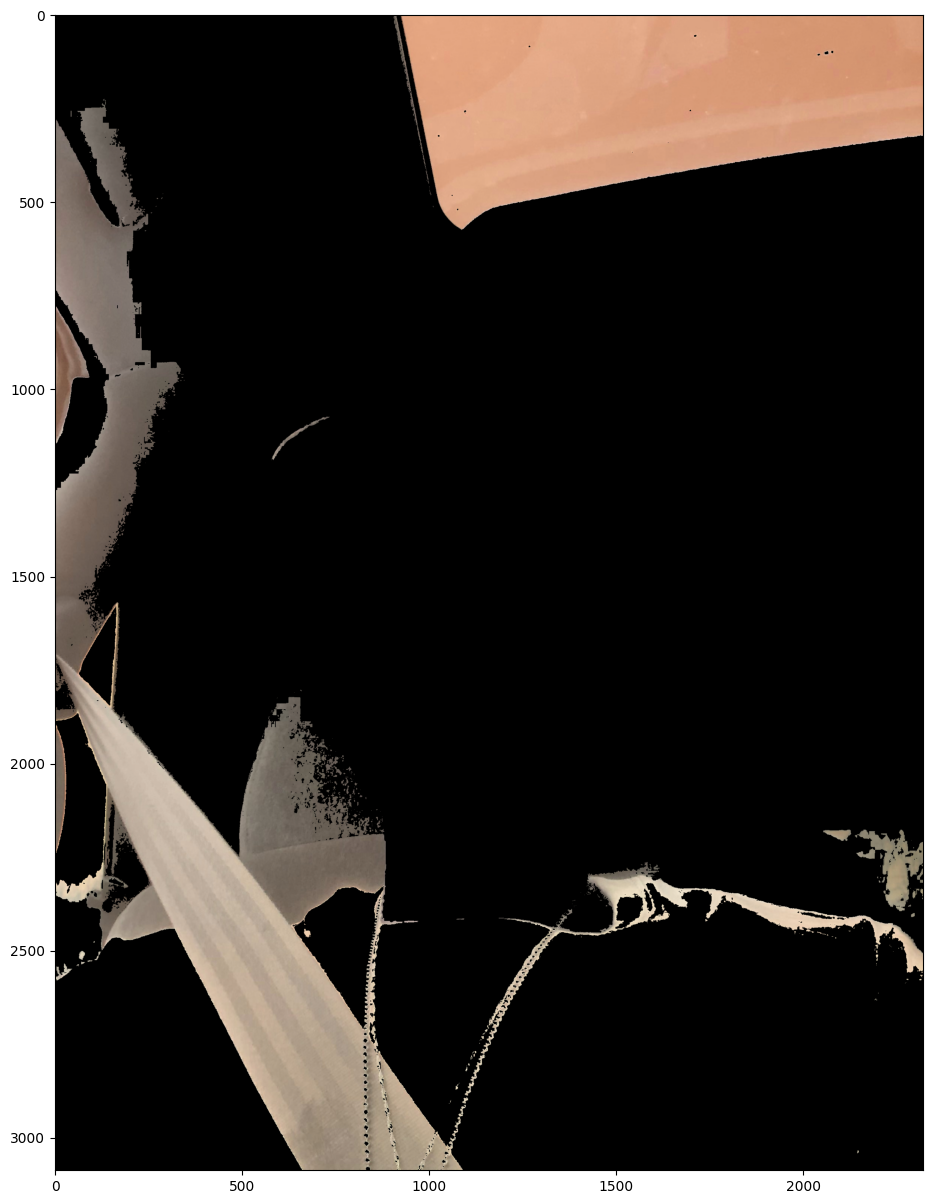

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('C:\\Users\\Reese\\OneDrive\\Pictures\\In Class Project2\\ProjectSelfie.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)
# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)
# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)
# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)
# Make image larger on plot.
fig = plt.figure(figsize=(15,15))
# Plot masked image.
plt.imshow(skinHSV)

Morphology Continued

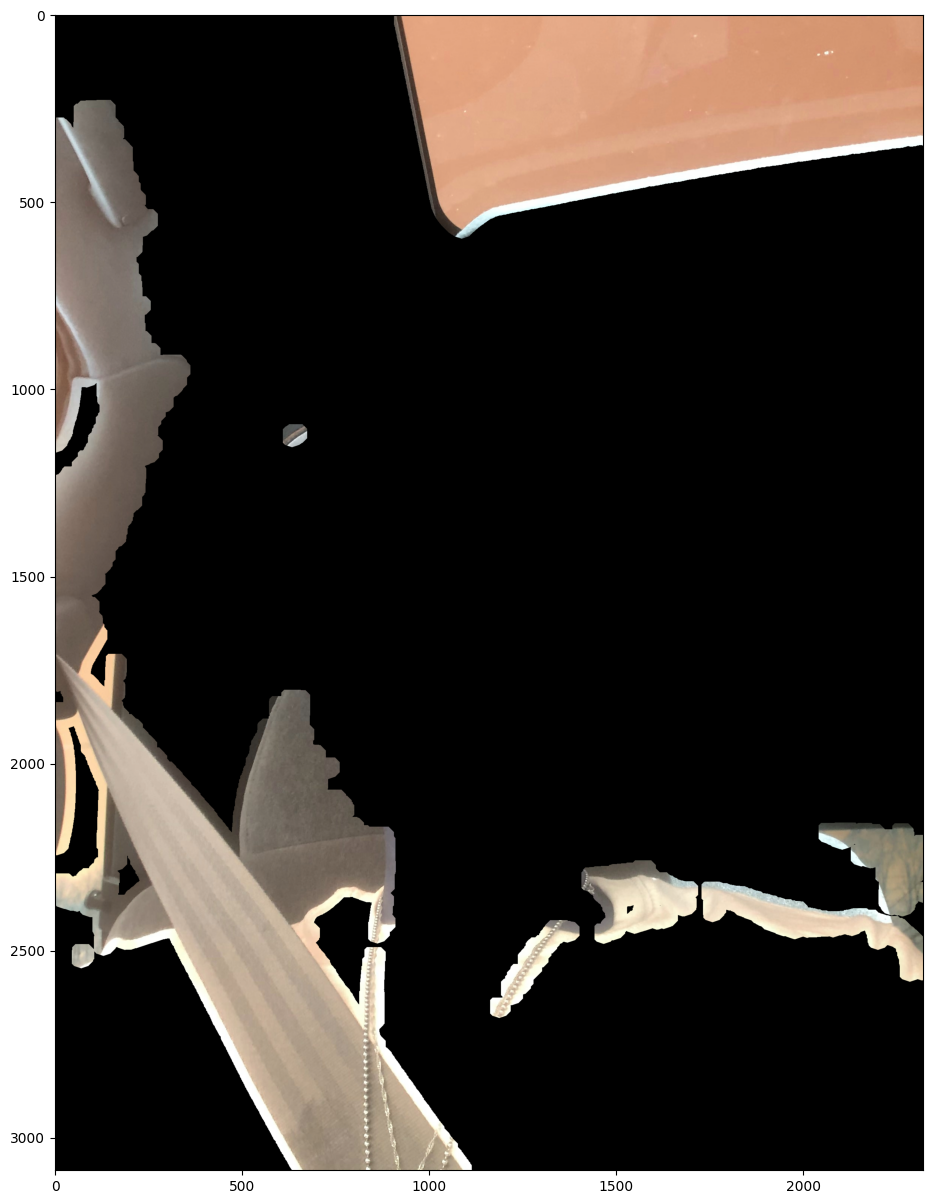

In [10]:
# Let's add the morphological operations
img = cv2.imread('C:\\Users\\Reese\\OneDrive\\Pictures\\In Class Project2\\ProjectSelfie.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)
# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)
# apply a series of erosions and dilations to the mask
# using an elliptical kernel to remove any small blobs of noise.
# You can use the cv2.getStructuringElement() function to create an elliptical k
# You can also use a numpy array to create a custom kernel.
#kernel = np.array([[0, 0, 1, 0, 0],
# [0, 1, 1, 1, 0],
# [1, 1, 1, 1, 1],
# [0, 1, 1, 1, 0],
# [0, 0, 1, 0, 0]], np.uint8)
# This will create a 5x5 ellipse kernel with all ones.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
skinArea = cv2.erode(skinArea, kernel, iterations = 1)
skinArea = cv2.dilate(skinArea, kernel, iterations = 6)
# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)
# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)
# Make image larger on plot.
fig = plt.figure(figsize=(15,15))
# Plot masked image.
plt.imshow(skinHSV)

Variables 


In [ ]:
PREVIEW   = 0   # Preview Mode
GRAY      = 2  # Grayscale Filter
THRESHOLD = 3   # Threshold Filter

filter and tracker functions.

In [5]:
def Threshold_filter(frame):

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    h = frame.shape[0]
    w = frame.shape[1]

    imgThres = np.zeros((frame.shape[0],frame.shape[1]), dtype=np.uint8)

    for y in range(0,h):
    #Search each pixel in the row
        for x in range(0,w):
        
            #If the pixel value is above 100 set it to white.  If it is below 100 set it to black.
            if (frame[y,x] > 100):
                imgThres[y,x] = 255
            else:
                imgThres[y,x] = 0
    
    
    return imgThres

Sobel

In [ ]:
sobelX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=np.float32)
sobelY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=np.float32)

imgSobelX = cv2.filter2D(img, -1, kernelX)
imgSobelY = cv2.filter2D(img, -1, kernelY)

fig = plt.figure(figsize = (15,15))

fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

fig.add_subplot(1,3,2)
plt.imshow(imgSobelX, cmap='gray')
plt.title('Sobel X Edge Detection')

fig.add_subplot(1,3,3)
plt.imshow(imgSobelY, cmap='gray')
plt.title('Sobel Y Edge Detection')

In [ ]:
Sobel = cv2.add(imgSobelX, imgSobelY)
fig = plt.figure(figsize = (10,10))

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.imshow(Sobel, cmap='gray')

Threshold

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('C:\\Users\\Reese\\OneDrive\\Pictures\\In Class Project2\\ProjectSelfie.jpg')
plt.imshow(img,cmap='gray')
plt.show

In [ ]:
def threshold(img,thresh=127):
    return((img > thresh)*255).astype("uint8")
def reverse_threshold(img,thresh=127):
    return((img < thresh)*255).astype("uint8")
plt.imshow(reverse_threshold(img), cmap='gray')
plt.show()

In [ ]:
plt.imshow(reverse_threshold(img,200),cmap='gray')
plt.show()

Video Image Loop 